---

## 필수 라이브러리 설치 및 한글 폰트 설정

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
import numpy as np
import matplotlib as mpl
from pathlib import Path
from IPython.display import display as dp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import urllib.request

In [108]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import urllib.request

def change_matplotlib_font(font_url):
    FONT_DIR = "MY_FONT"
    FONT_PATH = os.path.join(FONT_DIR, "NanumGothic.ttf")

    # 1. 폰트 다운로드
    os.makedirs(FONT_DIR, exist_ok=True)
    urllib.request.urlretrieve(font_url, FONT_PATH)

    # 2. matplotlib fontManager에 추가
    fm.fontManager.addfont(FONT_PATH)

    # 3. font 이름 추출
    font_name = fm.FontProperties(fname=FONT_PATH).get_name()

    # 4. 전역 설정 반영
    matplotlib.rc('font', family=font_name)
    plt.rcParams['axes.unicode_minus'] = False

# ---- 실행 ----
change_matplotlib_font("https://raw.githubusercontent.com/fonts-archive/NanumGothic/main/NanumGothic.ttf")

---

## 1. 데이터 불러오기 및 기본 정보 확인

#### 1-1. 데이터 불러오기

In [109]:
# CSV 파일 URL
url = "https://raw.githubusercontent.com/JyoARa/Machine-Learning/refs/heads/main/Project/Titanic/train.csv"

# 불러오기
df = pd.read_csv(url)

# 처음 5행 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
# 원본 복사
df_kor = df.copy()

In [111]:
# 컬럼명 한글화

# 컬럼명 매핑 (영어 → 한글)
columns_map = {
    "PassengerId": "승객ID",
    "Survived": "생존여부",
    "Pclass": "객실등급",
    "Name": "이름",
    "Sex": "성별",
    "Age": "나이",
    "SibSp": "형제/배우자수",
    "Parch": "부모/자녀수",
    "Ticket": "티켓번호",
    "Fare": "요금",
    "Cabin": "객실번호",
    "Embarked": "승선항구"
}

# rename으로 변경
df_kor.rename(columns=columns_map, inplace=True)

# 확인
df_kor.head()

,승객ID,생존여부,객실등급,이름,성별,나이,형제/배우자수,부모/자녀수,티켓번호,요금,객실번호,승선항구
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

#### 1-2. 데이터 구조 확인

In [112]:
print("- shape :", df_kor.shape)                 

- shape : (891, 12)


In [113]:
df_kor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   승객ID     891 non-null    int64  
 1   생존여부     891 non-null    int64  
 2   객실등급     891 non-null    int64  
 3   이름       891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   형제/배우자수  891 non-null    int64  
 7   부모/자녀수   891 non-null    int64  
 8   티켓번호     891 non-null    object 
 9   요금       891 non-null    float64
 10  객실번호     204 non-null    object 
 11  승선항구     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---

#### 1-3. 데이터 요약 통계 확인


In [114]:
print("[수치형 통계 요약]")
dp(df_kor.describe())

print("[범주형 통계 요약]")
dp(df_kor.describe(include='object'))

[수치형 통계 요약]


,승객ID,생존여부,객실등급,나이,형제/배우자수,부모/자녀수,요금
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[범주형 통계 요약]


,이름,성별,티켓번호,객실번호,승선항구
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


(참고) 아래 코드는 도메인 지식을 반영하여, 분석에 영향을 미치지 않는 의미 없는 컬럼(승객ID, 이름)은 제외하고, 실제로는 범주형 의미를 갖는 컬럼(생존여부, 객실등급)을 수치형이 아닌 범주형으로 조정한 뒤 요약 통계를 확인한 결과이다.

In [115]:
# 수치형 / 범주형 변수 자동 분류
num_cols = df_kor.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_kor.select_dtypes(exclude=[np.number]).columns.tolist()

# 제외할 컬럼 (분석에 사용하지 않음)
exclude_cols = ["승객ID"]

# 수치형 → 범주형으로 옮길 컬럼
num_to_cat = ["생존여부", "객실등급"]

# 제외 컬럼 제거
num_cols = [c for c in num_cols if c not in exclude_cols + num_to_cat]
cat_cols = [c for c in cat_cols if c not in exclude_cols]

# 수치형에서 옮겨온 컬럼을 범주형에 추가
cat_cols = list(set(cat_cols + num_to_cat))


In [116]:
print("[실제 수치형 통계 요약]")
dp(df_kor[num_cols].describe())

print("[실제 범주형 통계 요약]")
dp(df_kor[cat_cols].astype("object").describe())

[실제 수치형 통계 요약]


,나이,형제/배우자수,부모/자녀수,요금
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


[실제 범주형 통계 요약]


,티켓번호,객실등급,생존여부,승선항구,성별,이름,객실번호
count,891,891,891,889,891,891,204
unique,681,3,2,3,2,891,147
top,347082,3,0,S,male,"Braund, Mr. Owen Harris",G6
freq,7,491,549,644,577,1,4


---

## 2. 데이터 이해

#### 2-1. 컬럼별 의미 설명

In [117]:
print("columns :", df_kor.columns.tolist())    # 데이터프레임의 전체 컬럼 이름을 리스트로 출력

columns : ['승객ID', '생존여부', '객실등급', '이름', '성별', '나이', '형제/배우자수', '부모/자녀수', '티켓번호', '요금', '객실번호', '승선항구']


| 원본 영문 컬럼명      | 한글 컬럼명      | 설명                                                           | 데이터 타입(dtype) | 구분(수치형/범주형) |
| --------------- | ----------- | ------------------------------------------------------------ | ------------- | ----------- |
| **PassengerId** | **승객ID**    | 승객 고유 ID (단순 번호, 분석에는 크게 의미 없음)                              | int64         | 수치형(식별자)    |
| **Survived**    | **생존여부**    | 생존 여부 (타깃 변수) → `0 = 사망`, `1 = 생존`                           | int64         | **범주형**     |
| **Pclass**      | **객실등급**    | 선실 등급 (사회적/경제적 지위 지표) → `1 = 1등석`, `2 = 2등석`, `3 = 3등석`      | int64         | **범주형**     |
| **Name**        | **이름**      | 승객 이름 (이름, 성, 호칭(title) 포함. Feature Engineering에서 활용 가능)     | object        | 범주형         |
| **Sex**         | **성별**      | 성별 (`male`, `female`)                                        | object        | 범주형         |
| **Age**         | **나이**      | 나이 (일부 결측치 존재)                                               | float64       | 수치형         |
| **SibSp**       | **형제/배우자수** | 함께 탑승한 형제/자매(sibling) + 배우자(spouse) 수                        | int64         | 수치형         |
| **Parch**       | **부모/자녀수**  | 함께 탑승한 부모(parent) + 자녀(children) 수                           | int64         | 수치형         |
| **Ticket**      | **티켓번호**    | 티켓 번호 (패턴 추출 가능하나 일반적으로는 크게 사용하지 않음)                         | object        | 범주형         |
| **Fare**        | **요금**      | 운임 요금 (탑승 등급/선실 위치와 관련)                                      | float64       | 수치형         |
| **Cabin**       | **객실번호**    | 선실 번호 (결측치 많음. 선실의 앞 글자 = 구역 정보로 활용 가능)                      | object        | 범주형         |
| **Embarked**    | **승선항구**    | 탑승 항구 → `C = Cherbourg`, `Q = Queenstown`, `S = Southampton` | object        | 범주형         |


---
#### 2-2 결측치 확인

In [118]:
# 각 컬럼별 결측치 개수 계산
missing_count = df_kor.isnull().sum()

# 전체 대비 결측치 비율 계산
missing_ratio = (missing_count / len(df_kor)) * 100

# 결측치 현황을 DataFrame으로 정리
missing_df = pd.DataFrame({
    "결측치 개수": missing_count,
    "결측치 비율(%)": missing_ratio.round(2)
})

# 결측치 많은 순으로 정렬
missing_df = missing_df.sort_values(by="결측치 개수", ascending=False)

# 표로 출력
dp(missing_df)

,결측치 개수,결측치 비율(%)
객실번호,687,77.10
나이,177,19.87
승선항구,2,0.22
승객ID,0,0.00
이름,0,0.00
객실등급,0,0.00
생존여부,0,0.00
성별,0,0.00
부모/자녀수,0,0.00
형제/배우자수,0,0.00


---

#### 2-3 중복 데이터 여부 확인

In [119]:
print("[동일인물 존재 확인: 티켓번호 + 이름 + 나이 + 성별]")

# 동일인물 중복 수
dup_person = df_kor.duplicated(subset=["티켓번호", "이름", "나이", "성별"]).sum()
print(f"동일인물 수 : {dup_person}")

# 중복 데이터 샘플 출력
if dup_person > 0:
    print("\n[중복된 동일인물 샘플]")
    print(df_kor[df_kor.duplicated(subset=["티켓번호", "이름", "나이", "성별"], keep=False)].head())

[동일인물 존재 확인: 티켓번호 + 이름 + 나이 + 성별]
동일인물 수 : 0


---

## 3. 데이터 분포 확인 

#### 3-1. 타깃 데이터 분포

In [120]:
print("[타깃 분포]")
# 클래스별 개수
print(df_kor["생존여부"].value_counts())

print("\n[타깃 분포 비율]")
# 클래스별 비율
print(df_kor["생존여부"].value_counts(normalize=True).round(3))


[타깃 분포]
생존여부
0    549
1    342
Name: count, dtype: int64

[타깃 분포 비율]
생존여부
0    0.616
1    0.384
Name: proportion, dtype: float64


[타깃 분포 시각화]


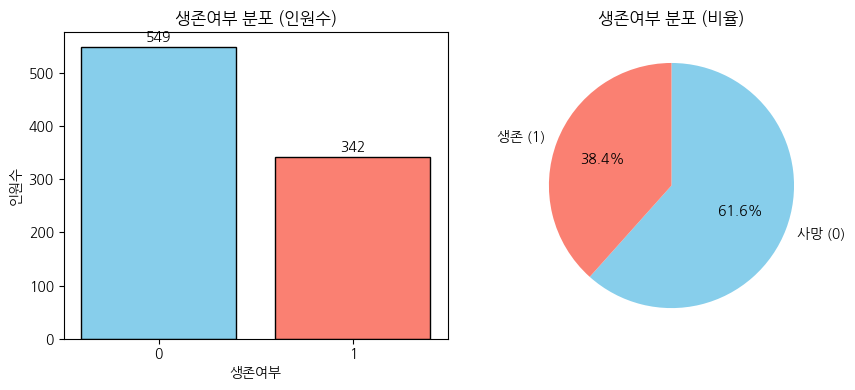

In [121]:
import matplotlib.pyplot as plt

print("[타깃 분포 시각화]")

# 생존여부 수와 비율
counts = df_kor["생존여부"].value_counts().sort_index()
ratios = df_kor["생존여부"].value_counts(normalize=True).sort_index()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# 막대그래프 (생존/사망 인원 수)
colors = ["skyblue", "salmon"]
bars = axes[0].bar(counts.index.astype(str), counts.values, color=colors, edgecolor="black")
axes[0].set_title("생존여부 분포 (인원수)")
axes[0].set_xlabel("생존여부")
axes[0].set_ylabel("인원수")

# 막대 위에 수 표시
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
                 ha="center", va="bottom", fontsize=10, fontweight="bold")

# 파이차트 (생존/사망 비율)
axes[1].pie(
    ratios.values,
    labels=["사망 (0)", "생존 (1)"],
    autopct="%.1f%%",
    colors=colors,
    startangle=90,
    counterclock=False
)
axes[1].set_title("생존여부 분포 (비율)")

plt.tight_layout()
plt.show()

---

#### 3-2. 범주형 컬럼 분포

In [122]:
print("[범주형 분포 분석]")

# 분석할 범주형 컬럼 목록 (df_kor에 존재하면서 분석이 필요한 컬럼만)
cat_cols = [c for c in ["객실등급", "성별", "승선항구"] if c in df_kor.columns]

for c in cat_cols:
    print(f"\n=== {c} 분포 ===")

    # 각 카테고리 개수 세기
    print("[인원수]")
    print(df_kor[c].value_counts(dropna=False))

    # 각 카테고리 비율 계산
    print("\n[비율]")
    print(df_kor[c].value_counts(normalize=True, dropna=False).round(3))


[범주형 분포 분석]

=== 객실등급 분포 ===
[인원수]
객실등급
3    491
1    216
2    184
Name: count, dtype: int64

[비율]
객실등급
3    0.551
1    0.242
2    0.207
Name: proportion, dtype: float64

=== 성별 분포 ===
[인원수]
성별
male      577
female    314
Name: count, dtype: int64

[비율]
성별
male      0.648
female    0.352
Name: proportion, dtype: float64

=== 승선항구 분포 ===
[인원수]
승선항구
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

[비율]
승선항구
S      0.723
C      0.189
Q      0.086
NaN    0.002
Name: proportion, dtype: float64


[범주형 분포 시각화]

=== 객실등급 분포 시각화 ===


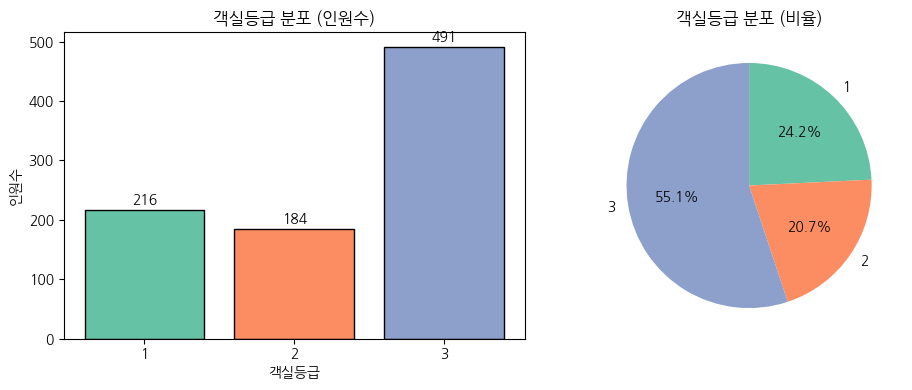


=== 성별 분포 시각화 ===


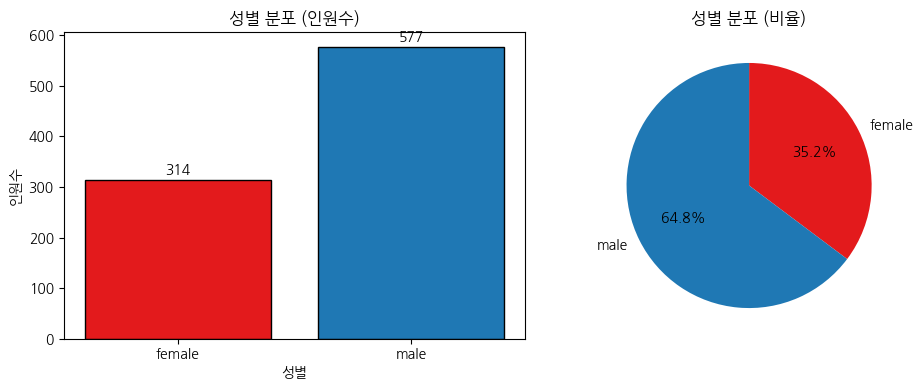


=== 승선항구 분포 시각화 ===


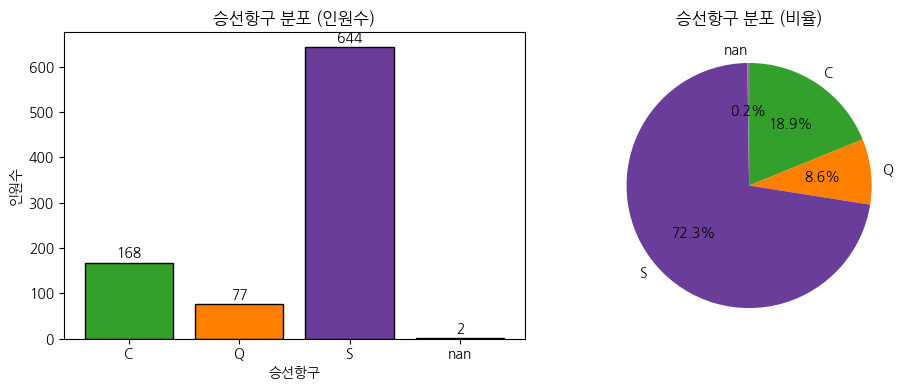

In [123]:
import matplotlib.pyplot as plt
import numpy as np

print("[범주형 분포 시각화]")

# 분석할 범주형 컬럼 목록
cat_cols = [c for c in ["객실등급", "성별", "승선항구"] if c in df_kor.columns]

# 컬럼별 색상 매핑 사전
color_maps = {
    "객실등급": {1: "#66c2a5", 2: "#fc8d62", 3: "#8da0cb"},
    "성별": {"male": "#1f78b4", "female": "#e31a1c", "남성": "#1f78b4", "여성": "#e31a1c"},
    "승선항구": {"C": "#33a02c", "Q": "#ff7f00", "S": "#6a3d9a", np.nan: "gray"}
}

for c in cat_cols:
    print(f"\n=== {c} 분포 시각화 ===")
    
    counts = df_kor[c].value_counts(dropna=False).sort_index()
    ratios = df_kor[c].value_counts(normalize=True, dropna=False).sort_index()

    # 색상 매핑 (counts 인덱스 순서에 맞춰 색상 리스트 생성)
    colors = [color_maps[c][val] for val in counts.index]

    # subplot 생성 (1행 2열)
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # --- (1) 막대그래프 (인원수) ---
    bars = axes[0].bar(counts.index.astype(str), counts.values,
                       color=colors, edgecolor="black")
    axes[0].set_title(f"{c} 분포 (인원수)")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("인원수")

    # 막대 위에 숫자 표시
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
                     ha="center", va="bottom", fontsize=10, fontweight="bold")

    # --- (2) 파이차트 (비율) ---
    axes[1].pie(
        ratios.values,
        labels=ratios.index.astype(str),
        autopct="%.1f%%",
        colors=colors,              # 막대그래프와 동일 색상
        startangle=90,
        counterclock=False
    )
    axes[1].set_title(f"{c} 분포 (비율)")

    plt.tight_layout()
    plt.show()

---

#### 3-3. 수치형 컬럼 분포

In [124]:
print("[수치형 분포 분석]")

# 수치형 컬럼 추출 (타깃과 ID 제외)
num_cols = df_kor.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ["생존여부", "승객ID"]  
num_cols = [c for c in num_cols if c not in exclude_cols]

# 1) 결측치 개수와 비율
print("\n[결측치 요약]")
missing = (
    df_kor[num_cols].isna()
      .sum()
      .rename("결측치 개수")
      .to_frame()
)
missing["결측치 비율(%)"] = (missing["결측치 개수"] / len(df_kor) * 100).round(2)

# 결측치 많은 순으로 정렬
missing = missing.sort_values(by="결측치 개수", ascending=False)

# 표 형태로 출력
display(missing)

# 2) 요약 통계
print("\n[수치형 요약 통계]")
display(df_kor[num_cols].describe().round(3))


[수치형 분포 분석]

[결측치 요약]


,결측치 개수,결측치 비율(%)
나이,177,19.87
객실등급,0,0.00
형제/배우자수,0,0.00
부모/자녀수,0,0.00
요금,0,0.00



[수치형 요약 통계]


,객실등급,나이,형제/배우자수,부모/자녀수,요금
count,891.000,714.000,891.000,891.000,891.000
mean,2.309,29.699,0.523,0.382,32.204
std,0.836,14.526,1.103,0.806,49.693
min,1.000,0.420,0.000,0.000,0.000
25%,2.000,20.125,0.000,0.000,7.910
50%,3.000,28.000,0.000,0.000,14.454
75%,3.000,38.000,1.000,0.000,31.000
max,3.000,80.000,8.000,6.000,512.329


[수치형 변수 분포 - 막대그래프 vs 트리맵 + KDE]


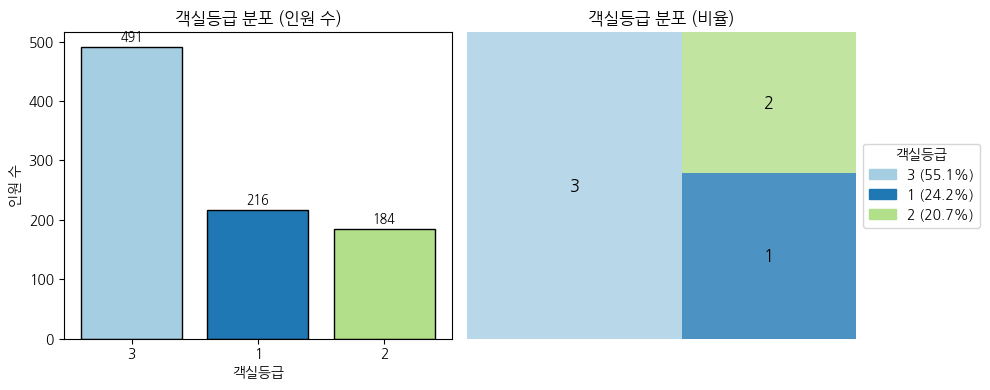

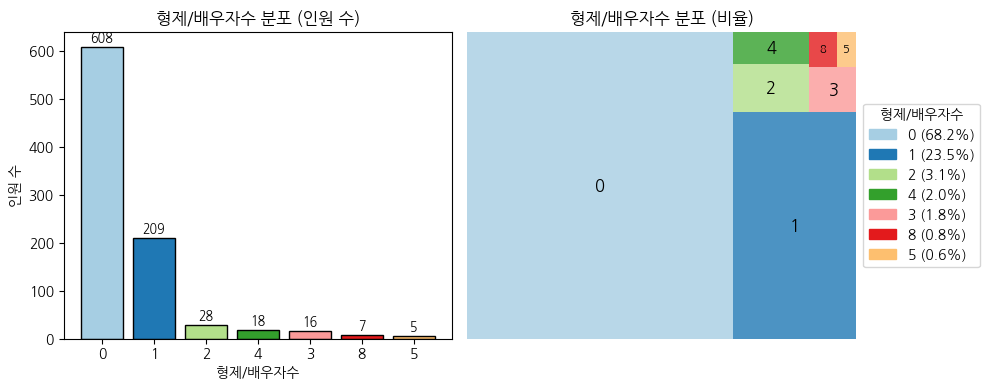

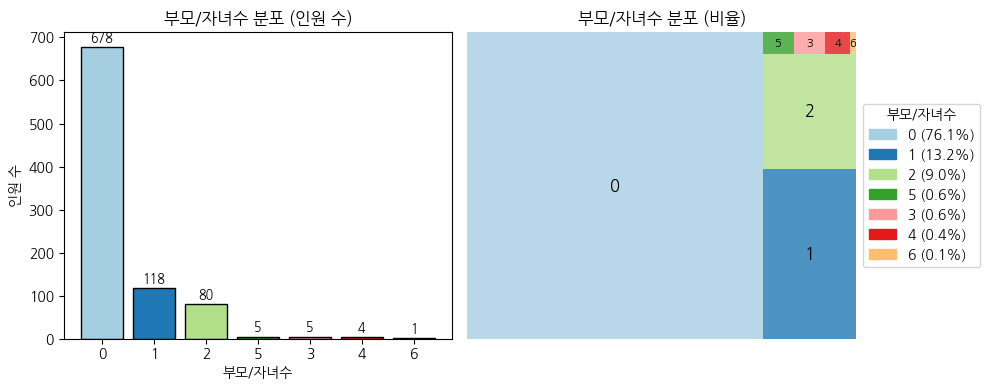

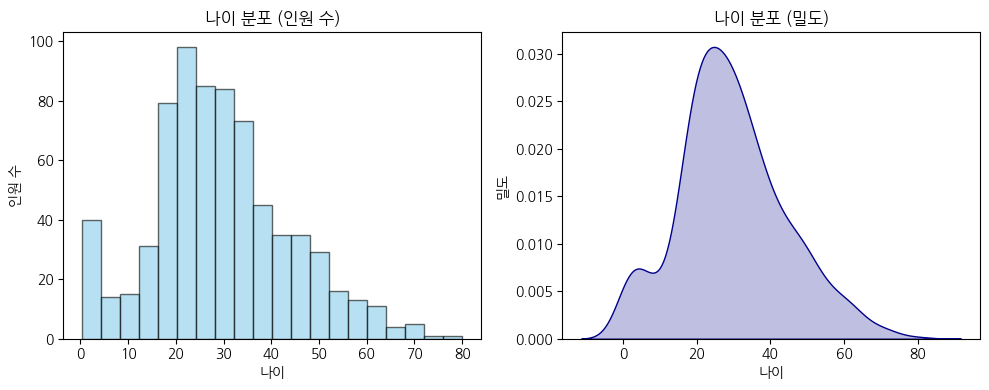

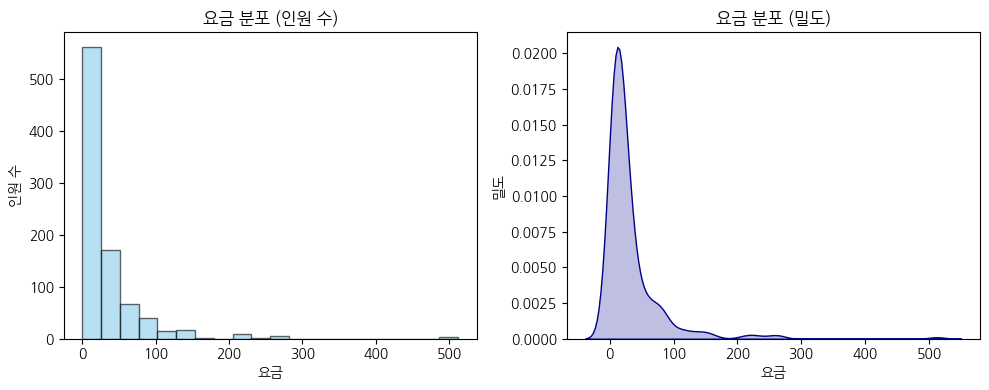

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import numpy as np

print("[수치형 변수 분포 - 막대그래프 vs 트리맵 + KDE]")

# 수치형 컬럼 추출 (타깃과 ID 제외)
num_cols = df_kor.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ["생존여부", "승객ID"]  # 한글 컬럼명 기준
num_cols = [c for c in num_cols if c not in exclude_cols]

# 연속형 / 이산형 변수 구분
continuous_cols = ["나이", "요금"]  # 연속형
discrete_cols = [c for c in num_cols if c not in continuous_cols]  # 이산형

# --- 이산형 변수 시각화 ---
for c in discrete_cols:
    counts = df_kor[c].value_counts(dropna=False, normalize=False)
    ratios = df_kor[c].value_counts(normalize=True, dropna=False)

    # 비율 큰 순서대로 정렬
    ratios = ratios.sort_values(ascending=False)
    counts = counts.loc[ratios.index]

    # 색상 정의 (막대 + 트리맵 통일)
    colors = plt.cm.Paired.colors[:len(ratios)]

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # (1) 막대그래프 (인원 수)
    bars = axes[0].bar(
        counts.index.astype(str),
        counts.values,
        color=colors,
        edgecolor="black"
    )
    for i, v in enumerate(counts.values):
        axes[0].text(i, v + 5, str(v), ha="center", va="bottom", fontsize=9, fontweight="bold")
    axes[0].set_title(f"{c} 분포 (인원 수)")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("인원 수")

    # (2) 트리맵 (비율)
    labels = [str(idx) for idx in ratios.index]  # 그림 안에는 값만
    squarify.plot(
        sizes=ratios.values,
        label=labels,
        color=colors,
        alpha=0.8,
        ax=axes[1],
        text_kwargs={'fontsize': 12, 'weight': 'bold'}
    )

    # 작은 값은 글씨 축소
    for t, val in zip(axes[1].texts, ratios.values):
        if val < 0.01:
            t.set_fontsize(8)
            t.set_color("black")

    axes[1].set_title(f"{c} 분포 (비율)")
    axes[1].axis("off")

    # 범례 (값 + 비율%)
    legend_labels = [f"{idx} ({val:.1%})" for idx, val in zip(ratios.index, ratios.values)]
    axes[1].legend(
        handles=[plt.Rectangle((0,0),1,1, color=col) for col in colors],
        labels=legend_labels,
        title=c,
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

    plt.tight_layout()
    plt.show()

# --- 연속형 변수 시각화 ---
for c in continuous_cols:
    data = df_kor[c].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # (1) 히스토그램 (인원 수)
    axes[0].hist(data, bins=20, color="skyblue", edgecolor="black", alpha=0.6)
    axes[0].set_title(f"{c} 분포 (인원 수)")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("인원 수")

    # (2) KDE 곡선 (Seaborn 사용, fill=True)
    sns.kdeplot(data, fill=True, ax=axes[1], color="darkblue")
    axes[1].set_title(f"{c} 분포 (밀도)")
    axes[1].set_xlabel(c)
    axes[1].set_ylabel("밀도")

    plt.tight_layout()
    plt.show()


---

## 4. 데이터 분석을 위한 전처리

In [126]:
df_Target = df_kor["생존여부"]
df_Features = df_kor.drop(columns=["생존여부"])

display(df_Target.to_frame().head())
display(df_Features.head())

,생존여부
0,0
1,1
2,1
3,1
4,0


,승객ID,객실등급,이름,성별,나이,형제/배우자수,부모/자녀수,티켓번호,요금,객실번호,승선항구
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
df_Features_Prep = df_Features.copy()

---

#### 🧹 결측치 처리

In [128]:
print("[결측치 확인]")

# 각 컬럼별 결측치 개수 계산
missing_count = df_Features_Prep.isnull().sum()

# 전체 대비 결측치 비율 계산
missing_ratio = (missing_count / len(df_Features_Prep)) * 100

# 결측치 현황을 DataFrame으로 정리
missing_df = pd.DataFrame({
    "결측치 개수": missing_count,
    "결측치 비율(%)": missing_ratio.round(2)
})

# 결측치 많은 순으로 정렬
missing_df = missing_df.sort_values(by="결측치 개수", ascending=False)

# 결측치가 하나라도 있는 컬럼만 출력
missing_df = missing_df[missing_df["결측치 개수"] > 0]

# 표로 출력
dp(missing_df)


[결측치 확인]


,결측치 개수,결측치 비율(%)
객실번호,687,77.10
나이,177,19.87
승선항구,2,0.22


In [129]:
print("[결측치 처리]")

# 나이: 중앙값으로 대체
if "나이" in df_Features_Prep.columns:
    age_missing_before = df_Features_Prep["나이"].isnull().sum()
    age_median = df_Features_Prep["나이"].median()
    df_Features_Prep["나이"] = df_Features_Prep["나이"].fillna(age_median)
    age_missing_after = df_Features_Prep["나이"].isnull().sum()
    print(f"- 나이 결측치 {age_missing_before}개 중앙값({age_median})으로 대체")

# 승선항구: 최빈값으로 대체
if "승선항구" in df_Features_Prep.columns:
    embarked_missing_before = df_Features_Prep["승선항구"].isnull().sum()
    embarked_mode = df_Features_Prep["승선항구"].mode()[0]
    df_Features_Prep["승선항구"] = df_Features_Prep["승선항구"].fillna(embarked_mode)
    embarked_missing_after = df_Features_Prep["승선항구"].isnull().sum()
    print(f"- 승선항구 결측치 {embarked_missing_before}개 최빈값('{embarked_mode}')으로 대체")

# 객실번호: Missing으로 대체
if "객실번호" in df_Features_Prep.columns:
    cabin_missing_before = df_Features_Prep["객실번호"].isnull().sum()
    df_Features_Prep["객실번호"] = df_Features_Prep["객실번호"].fillna("Missing")
    cabin_missing_after = df_Features_Prep["객실번호"].isnull().sum()
    print(f"- 객실번호 결측치 {cabin_missing_before}개 'Missing'으로 대체")

print("\n[결측치 처리 후 확인]")
missing_summary = df_Features_Prep.isnull().sum().to_frame(name="남은 결측치 개수")
dp(missing_summary)

[결측치 처리]
- 나이 결측치 177개 중앙값(28.0)으로 대체
- 승선항구 결측치 2개 최빈값('S')으로 대체
- 객실번호 결측치 687개 'Missing'으로 대체

[결측치 처리 후 확인]


,남은 결측치 개수
승객ID,0
객실등급,0
이름,0
성별,0
나이,0
형제/배우자수,0
부모/자녀수,0
티켓번호,0
요금,0
객실번호,0


---

#### ⚠️ 이상치 처리

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print("[수치형 데이터 이상치 확인 - IQR 기준]")

# 수치형 컬럼 선택
num_cols = df_Features_Prep.select_dtypes(include="number").columns

# 실제 의미가 범주형인 컬럼 제외
exclude_cols = ["승객ID", "객실등급"]
num_cols = [col for col in num_cols if col not in exclude_cols]

outlier_summary = []

# 이상치 요약 계산
for col in num_cols:
    Q1 = df_Features_Prep[col].quantile(0.25)
    Q3 = df_Features_Prep[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # 이상치 데이터만 추출
    outliers = df_Features_Prep[(df_Features_Prep[col] < lower) | (df_Features_Prep[col] > upper)][col].dropna()
    outlier_count = len(outliers)
    outlier_ratio = round(outlier_count / len(df_Features_Prep) * 100, 2)

    outlier_summary.append([outlier_count, outlier_ratio])

# DataFrame으로 정리
outlier_df = pd.DataFrame(outlier_summary, 
                          index=num_cols, 
                          columns=["이상치 개수", "이상치 비율(%)"])

# 이상치 많은 순으로 정렬
outlier_df = outlier_df.sort_values(by="이상치 개수", ascending=False)

print("\n[이상치 요약]")
display(outlier_df)

[수치형 데이터 이상치 확인 - IQR 기준]

[이상치 요약]


,이상치 개수,이상치 비율(%)
부모/자녀수,213,23.91
요금,116,13.02
나이,66,7.41
형제/배우자수,46,5.16


---

#### 🧩 파생 변수 생성

In [131]:
import pandas as pd

print("[파생변수 생성]")

# 1) 나이 구간화
구간_나이 = [0, 12, 18, 30, 50, 80]
라벨_나이 = ["어린이", "청소년", "청년", "성인", "노인"]

df_Features_Prep["나이구간"] = pd.cut(
    df_Features_Prep["나이"],
    bins=구간_나이,
    labels=라벨_나이,
    include_lowest=True
)

# 2) 가족인원 및 혼자여부
df_Features_Prep["가족인원"] = (
    df_Features_Prep["형제/배우자수"] + df_Features_Prep["부모/자녀수"] + 1
)
df_Features_Prep["혼자여부"] = (df_Features_Prep["가족인원"] == 1).astype(int)
df_Features_Prep["혼자여부"] = df_Features_Prep["혼자여부"].map({1: "O", 0: "X"})  # O=혼자, X=아님

# 3) 이름에서 칭호 추출
df_Features_Prep["칭호"] = df_kor["이름"].str.extract(r",\s*([^\.]+)\.")[0].str.strip()
칭호_빈도 = df_Features_Prep["칭호"].value_counts()
희귀칭호 = 칭호_빈도[칭호_빈도 < 10].index
df_Features_Prep["칭호"] = df_Features_Prep["칭호"].replace(희귀칭호, "Others")

# 4) 객실번호 첫 글자 추출
df_Features_Prep["객실첫글자"] = df_Features_Prep["객실번호"].astype(str).str[0]

# 5) 요금 구간화 (도메인 기반)
구간_요금 = [0, 10, 50, 100, df_Features_Prep["요금"].max()]
라벨_요금 = ["L", "M", "H", "VH"]

df_Features_Prep["요금구간"] = pd.cut(
    df_Features_Prep["요금"],
    bins=구간_요금,
    labels=라벨_요금,
    include_lowest=True
)

# 6) 동일티켓인원
df_Features_Prep["동일티켓인원"] = (
    df_Features_Prep.groupby("티켓번호")["승객ID"].transform("count")
)

dp(df_Features_Prep.head())

[파생변수 생성]


,승객ID,객실등급,이름,성별,나이,형제/배우자수,부모/자녀수,티켓번호,요금,객실번호,승선항구,나이구간,가족인원,혼자여부,칭호,객실첫글자,요금구간,동일티켓인원
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,청년,2,X,Mr,M,L,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,성인,2,X,Mrs,C,H,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,청년,1,O,Miss,M,L,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,성인,2,X,Mrs,C,H,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,성인,1,O,Mr,M,L,1


In [132]:
# 티켓 접두 문자열 추출 (공백 기준 첫 토큰)
df_ticket_prefix = df_Features["티켓번호"].astype(str).str.strip().str.split().str[0]

# 숫자만 있는 경우 제외
df_ticket_prefix = df_ticket_prefix[~df_ticket_prefix.str.isdigit()]

# 빈도수 집계 → 데이터프레임 변환
ticket_prefix_counts = df_ticket_prefix.value_counts().reset_index()
ticket_prefix_counts.columns = ["티켓접두", "개수"]

print("[티켓 접두 문자열 분포]")
display(ticket_prefix_counts)


[티켓 접두 문자열 분포]


,티켓접두,개수
0,PC,60
1,C.A.,27
2,STON/O,12
3,A/5,10
4,W./C.,9
5,SOTON/O.Q.,8
6,CA.,8
7,A/5.,7
8,SOTON/OQ,7
9,CA,6


In [133]:
df_Features_Prep["티켓문자여부"] = df_Features_Prep["티켓번호"].astype(str).str[0].apply(lambda x: 'X' if x.isdigit() else 'O')


[파생변수 분포 - 트리맵]


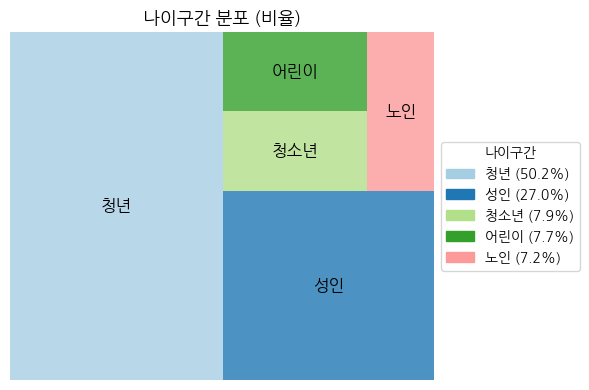

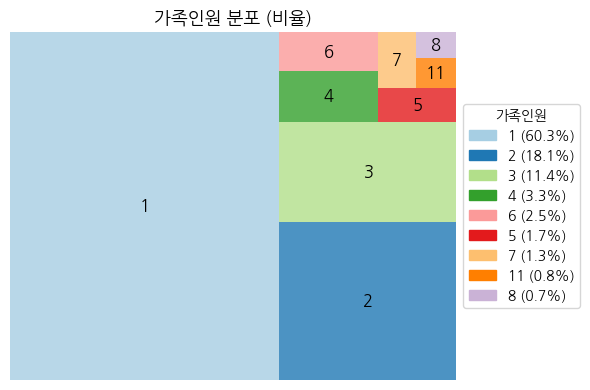

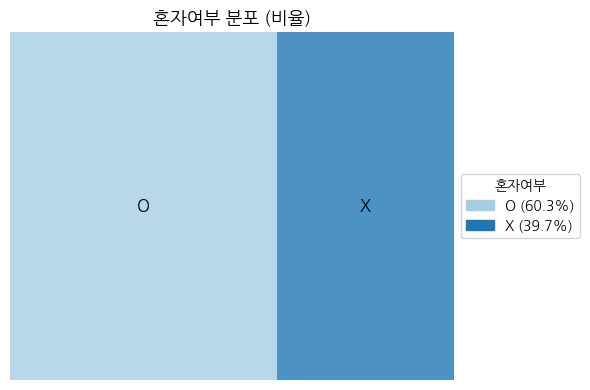

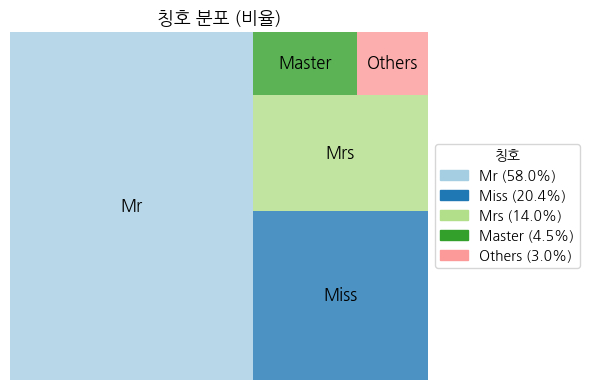

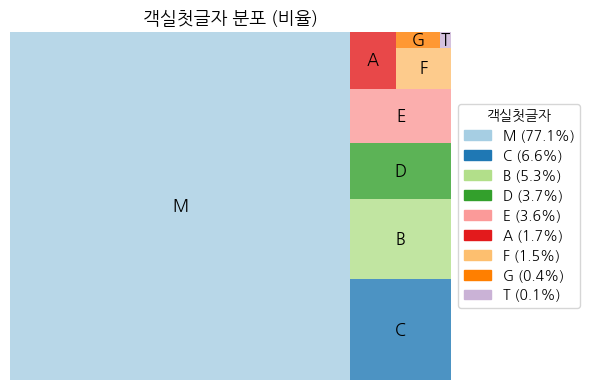

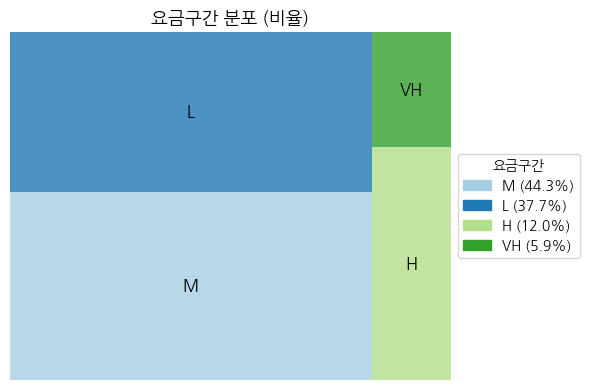

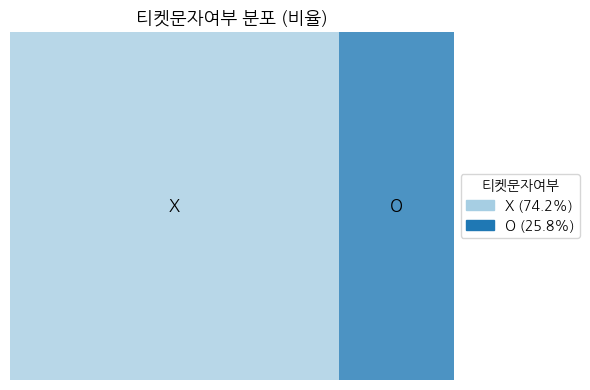

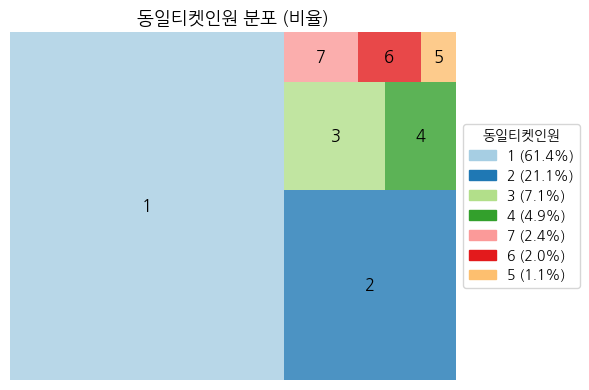

In [134]:
import matplotlib.pyplot as plt
import squarify

print("[파생변수 분포 - 트리맵]")

# 파생변수만 선택
derived_cols = ["나이구간", "가족인원", "혼자여부", "칭호", "객실첫글자", "요금구간", "티켓문자여부", "동일티켓인원"]

for c in derived_cols:
    if c not in df_Features_Prep.columns:
        continue  # 혹시 없는 컬럼은 건너뜀

    ratios = df_Features_Prep[c].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

    colors = plt.cm.Paired.colors[:len(ratios)]

    plt.figure(figsize=(6, 4))
    labels = [str(idx) for idx in ratios.index]  # 라벨 (범주명)
    squarify.plot(
        sizes=ratios.values,
        label=labels,
        color=colors,
        alpha=0.8,
        text_kwargs={'fontsize': 12, 'weight': 'bold'}
    )

    plt.title(f"{c} 분포 (비율)", fontsize=13)

    legend_labels = [f"{idx} ({val:.1%})" for idx, val in zip(ratios.index, ratios.values)]
    plt.legend(
        handles=[plt.Rectangle((0,0),1,1, color=col) for col in colors],
        labels=legend_labels,
        title=c,
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

    plt.axis("off")
    plt.tight_layout()
    plt.show()


#### 📔 전처리 완료 데이터프레임

In [135]:
df_Features_Prep.head()

,승객ID,객실등급,이름,성별,나이,형제/배우자수,부모/자녀수,티켓번호,요금,객실번호,승선항구,나이구간,가족인원,혼자여부,칭호,객실첫글자,요금구간,동일티켓인원,티켓문자여부
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,청년,2,X,Mr,M,L,1,O
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,성인,2,X,Mrs,C,H,1,O
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,청년,1,O,Miss,M,L,1,O
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,성인,2,X,Mrs,C,H,2,X
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,성인,1,O,Mr,M,L,1,X


---

#### 5. 범주형 변수별 생존율 분석

[범주형 변수별 생존율 분석]


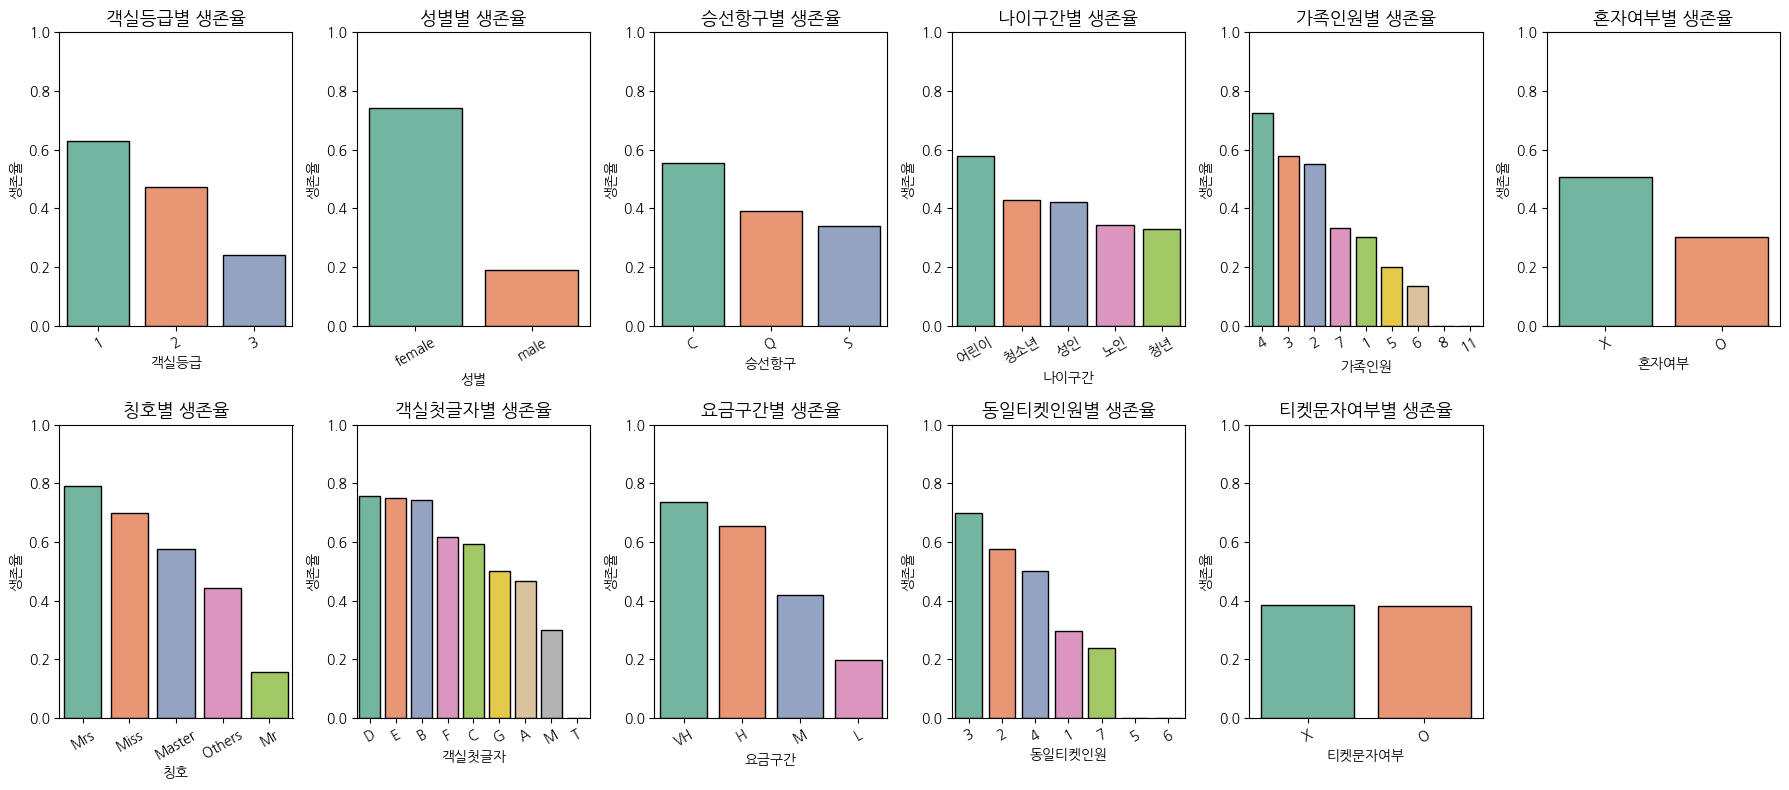

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

print("[범주형 변수별 생존율 분석]")

# 1) 분석에서 제외할 원본 변수들
exclude_cols = ["승객ID", "이름", "나이", "형제/배우자수", "부모/자녀수", "티켓번호", "요금", "객실번호"]

# 2) 실제 분석할 변수들만 선택
analysis_cols = [c for c in df_Features_Prep.columns if c not in exclude_cols]

# 3) 서브플롯 설정 (2행 6열)
n_cols = 6
n_rows = (len(analysis_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.flatten()

for i, c in enumerate(analysis_cols):
    rates = (
        df_Features_Prep.join(df_Target)
        .groupby(c, observed=True)["생존여부"]  # ✅ observed=True로 경고 해결
        .mean()
        .sort_values(ascending=False)
    )

    sns.barplot(
        x=rates.index.astype(str),
        y=rates.values,
        hue=rates.index.astype(str),  # ✅ hue 추가
        palette="Set2",
        legend=False,
        edgecolor="black",
        ax=axes[i]
    )

    axes[i].set_title(f"{c}별 생존율", fontsize=13)
    axes[i].set_ylabel("생존율")
    axes[i].set_xlabel(c)
    axes[i].tick_params(axis="x", rotation=30)  # ✅ 안전한 라벨 회전
    axes[i].set_ylim(0, 1)

# 빈 subplot 숨기기
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


[수치형 변수별 생존율 추세 분석]


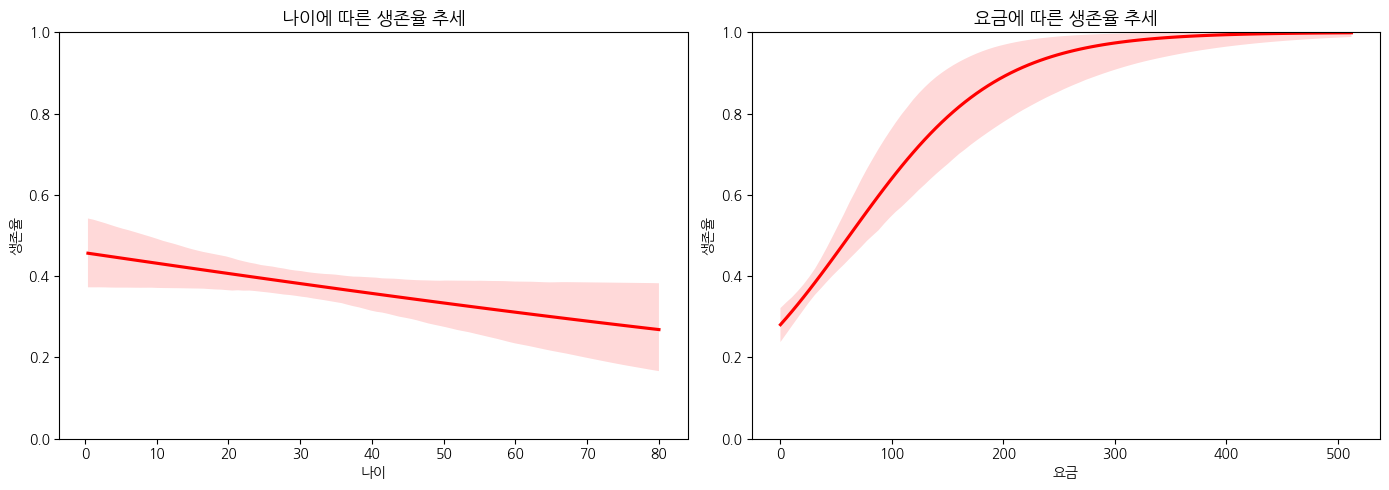

In [137]:
print("[수치형 변수별 생존율 추세 분석]")

num_cols = ["나이", "요금"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, c in enumerate(num_cols):
    sns.regplot(
        x=df_Features_Prep[c],
        y=df_Target,
        logistic=True,   # 로지스틱 회귀 곡선 → 생존확률 추세
        scatter=False,   # 산점도 생략 (지저분해질 수 있음)
        line_kws={"color":"red"},
        ax=axes[i]
    )
    axes[i].set_title(f"{c}에 따른 생존율 추세", fontsize=13)
    axes[i].set_ylabel("생존율")
    axes[i].set_xlabel(c)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

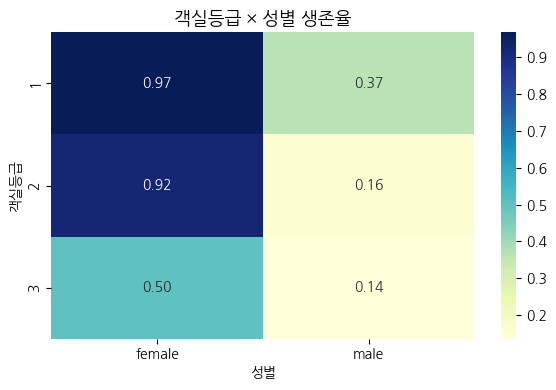

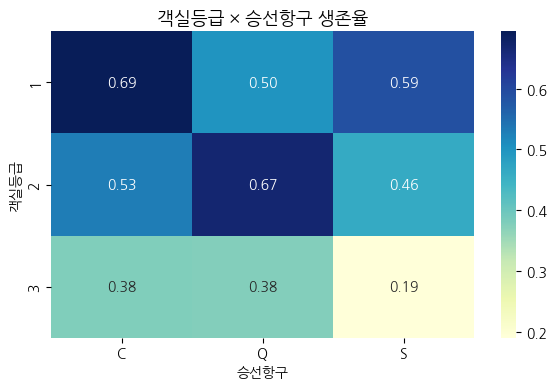

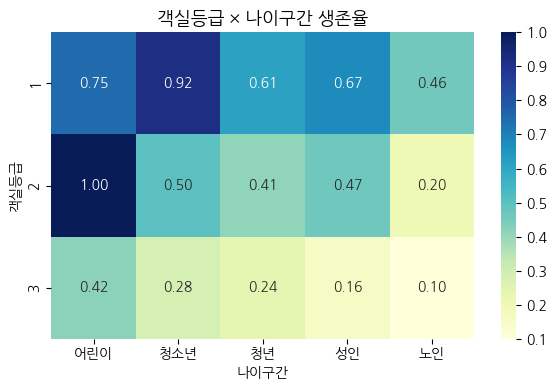

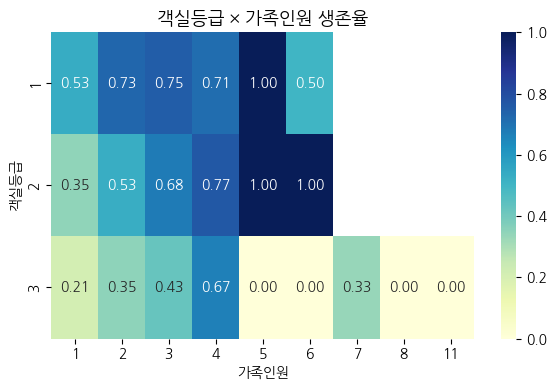

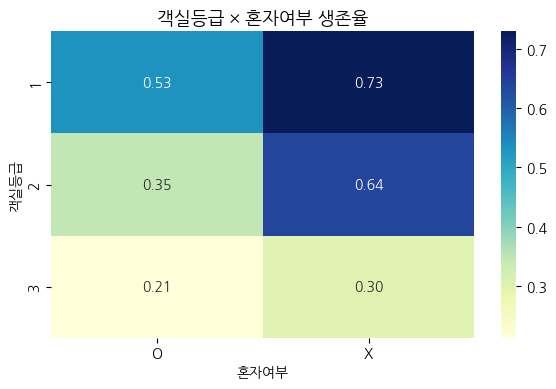

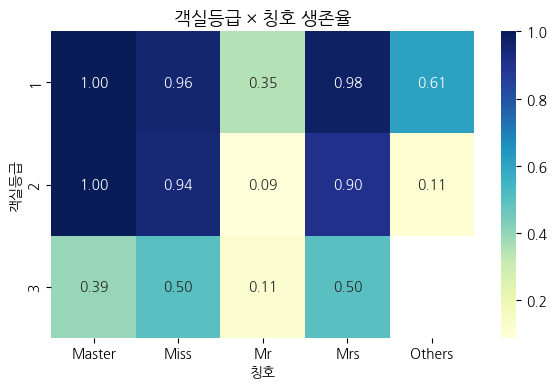

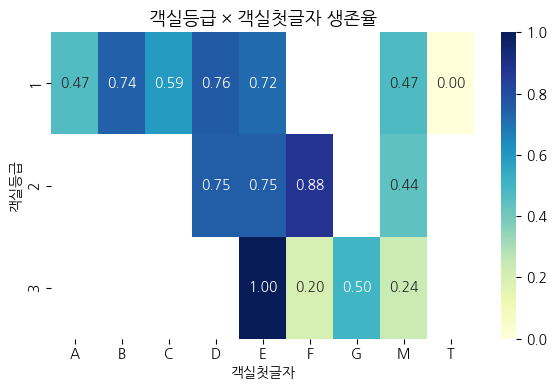

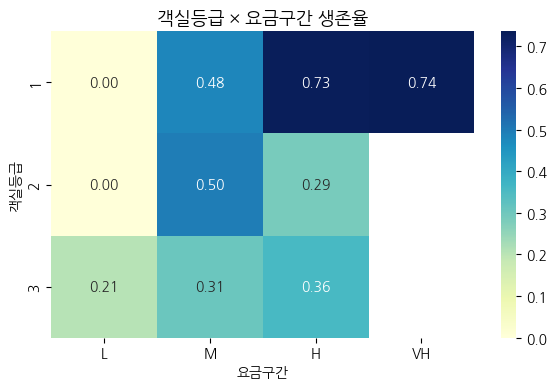

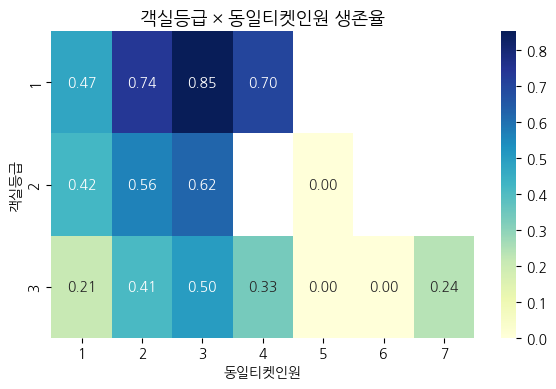

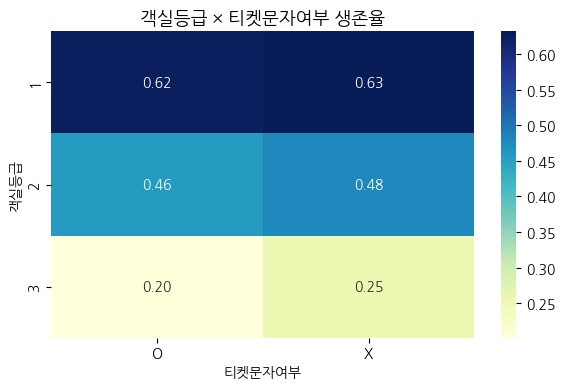

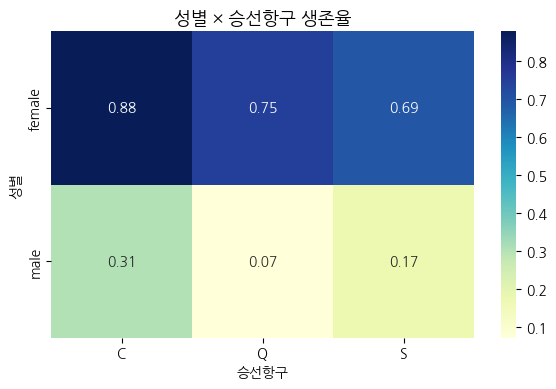

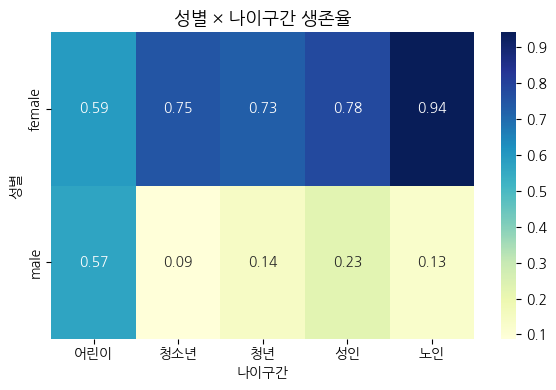

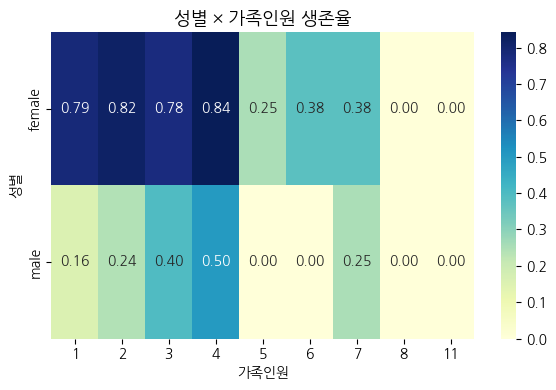

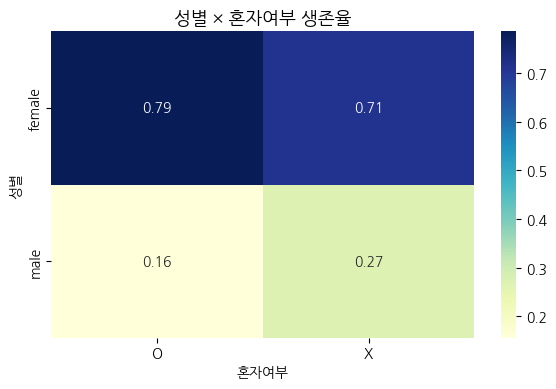

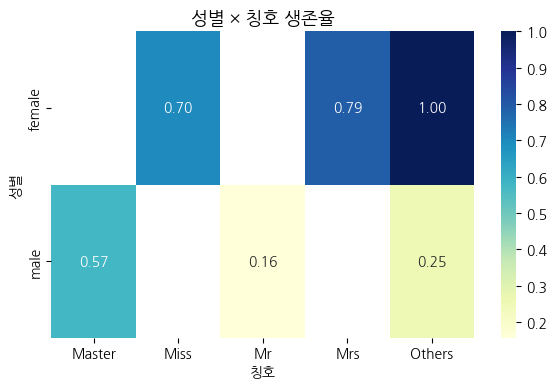

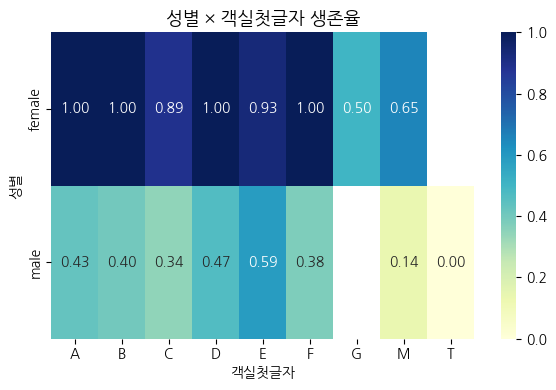

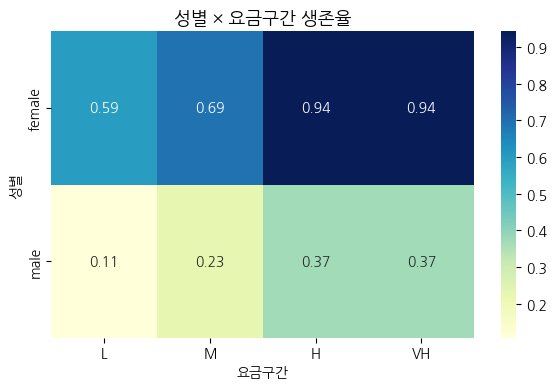

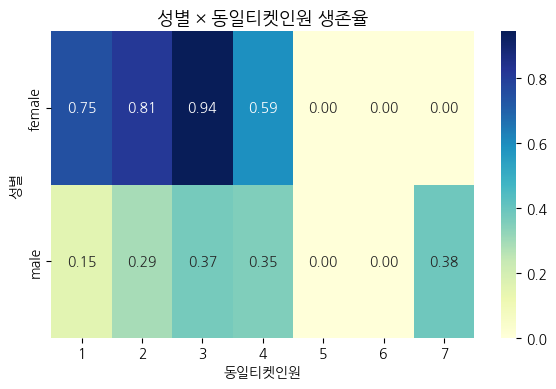

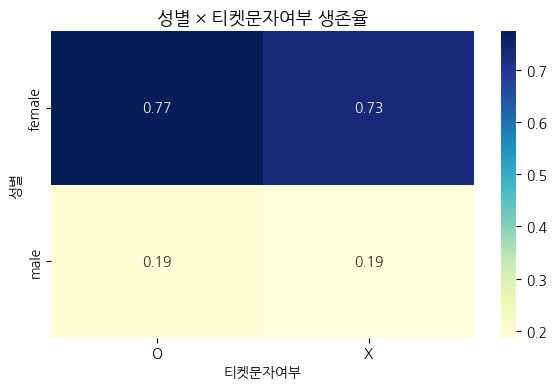

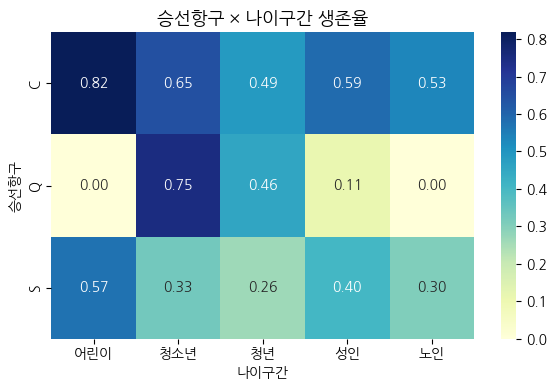

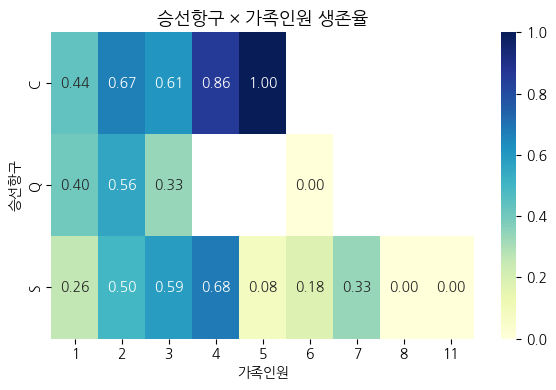

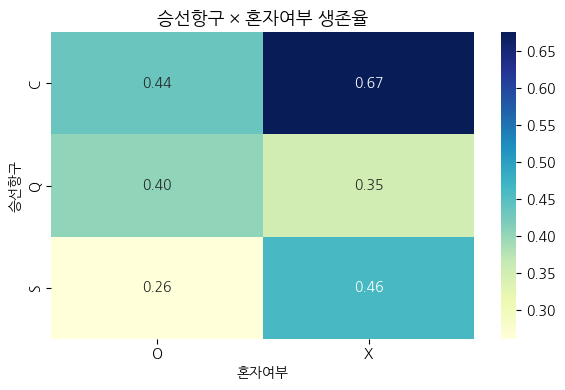

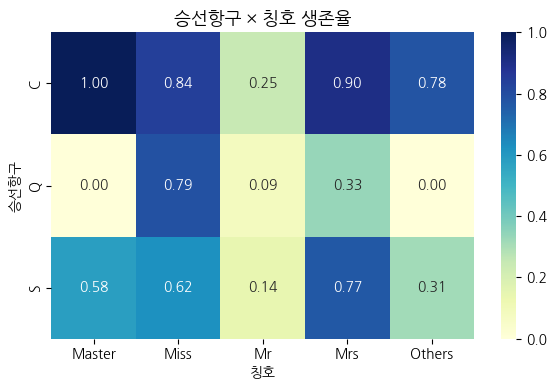

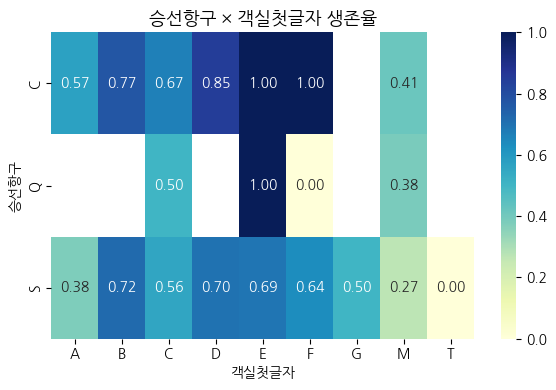

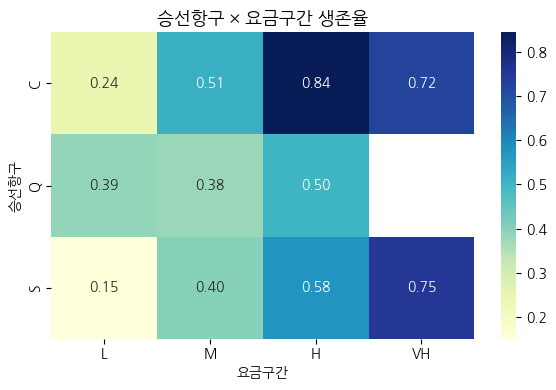

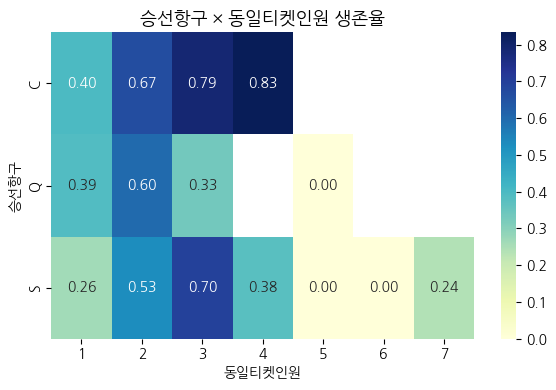

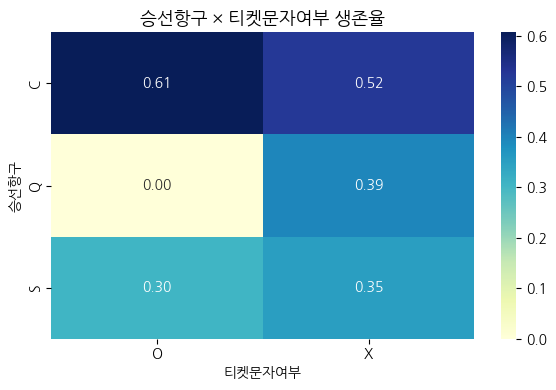

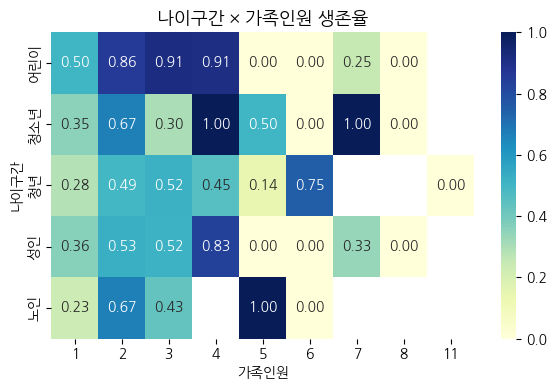

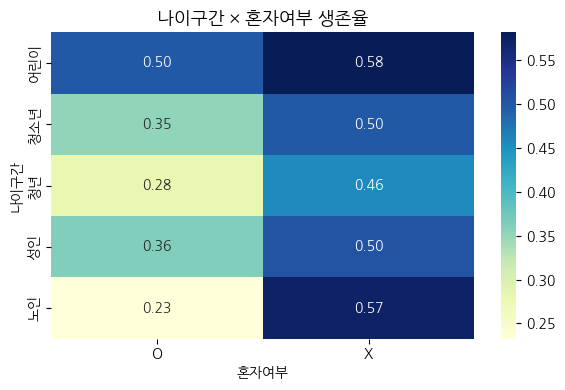

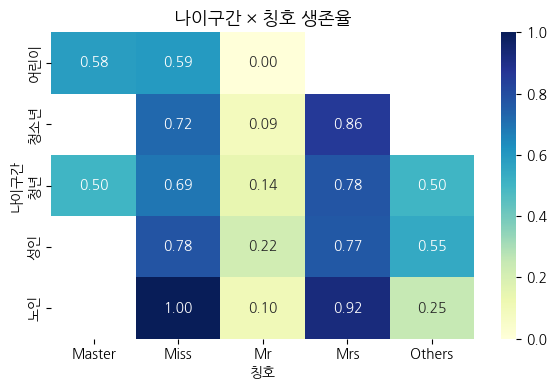

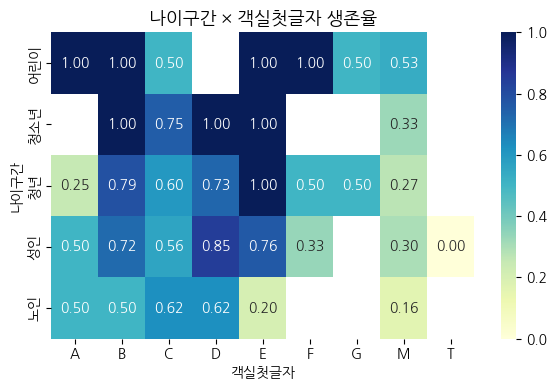

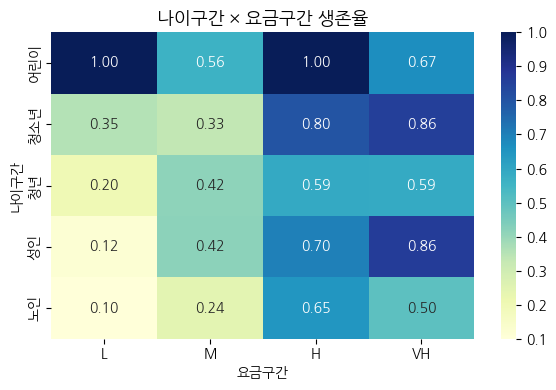

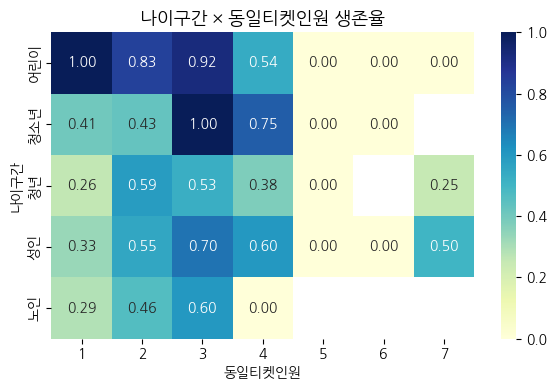

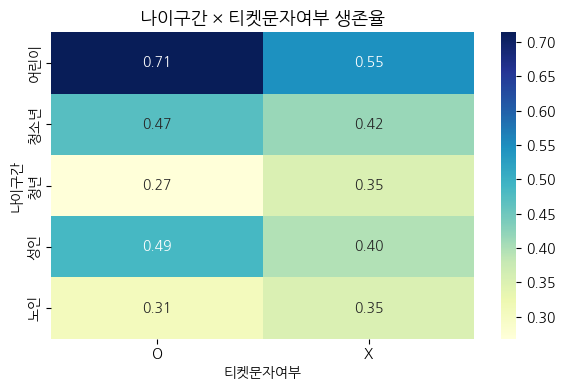

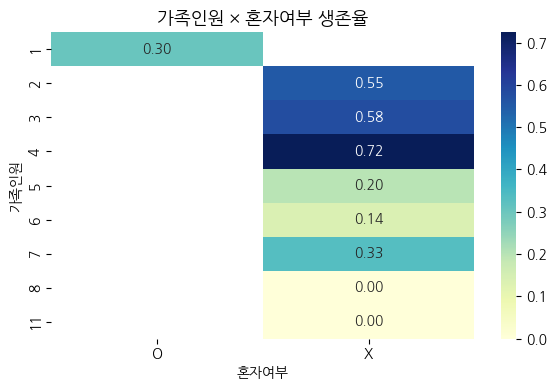

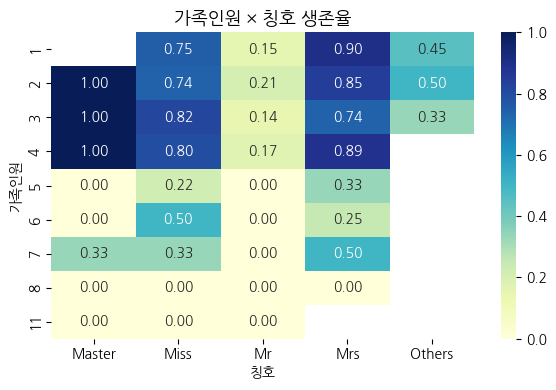

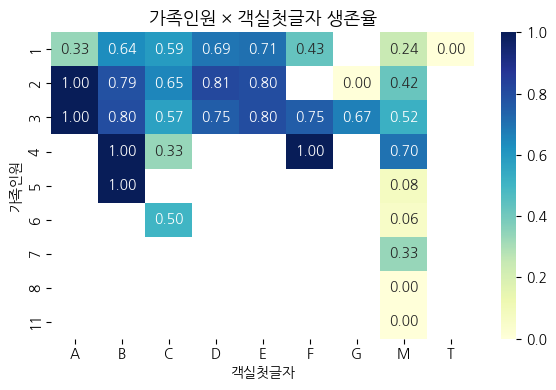

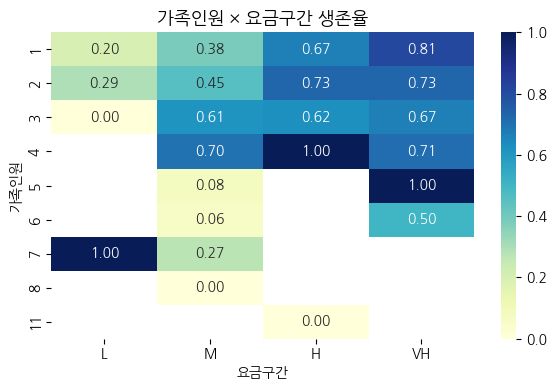

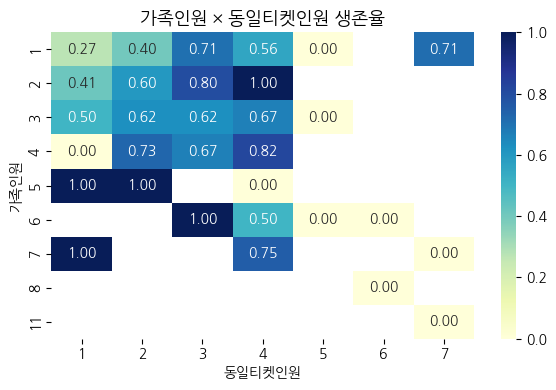

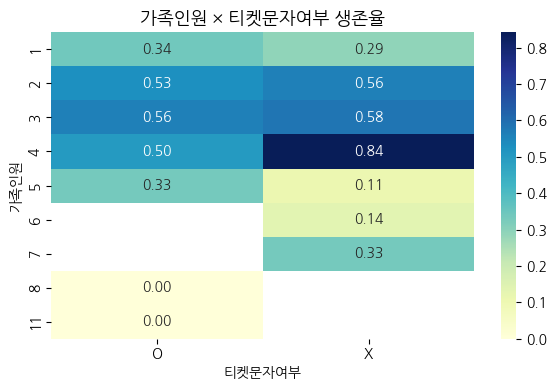

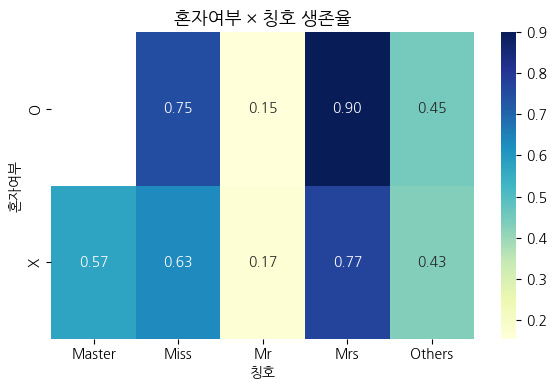

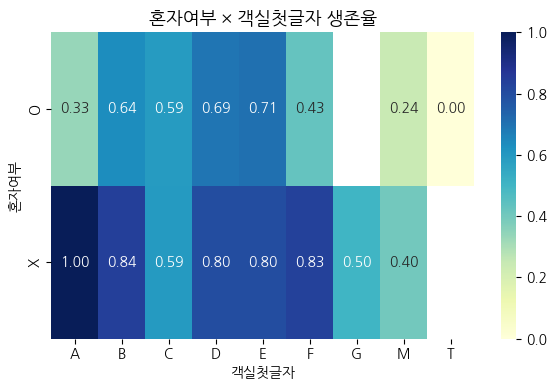

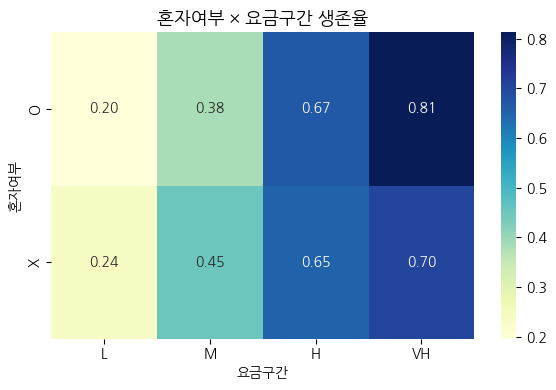

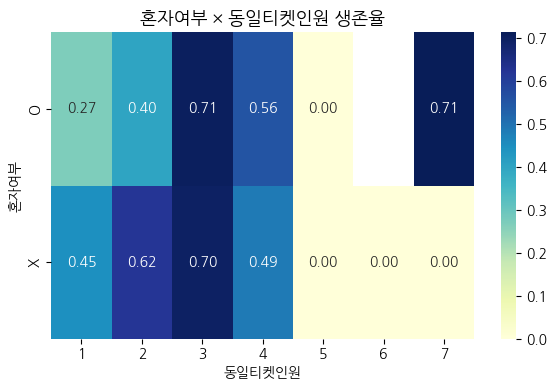

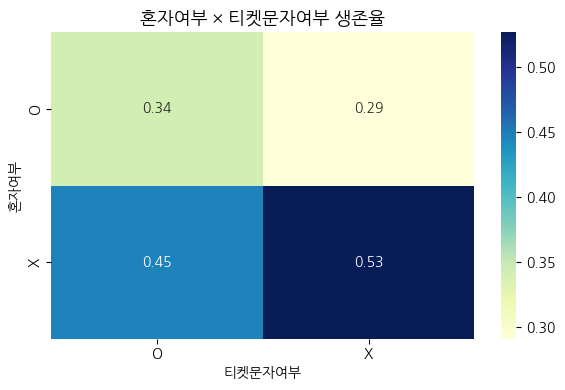

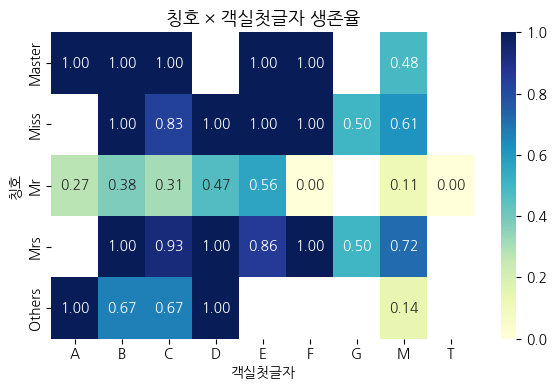

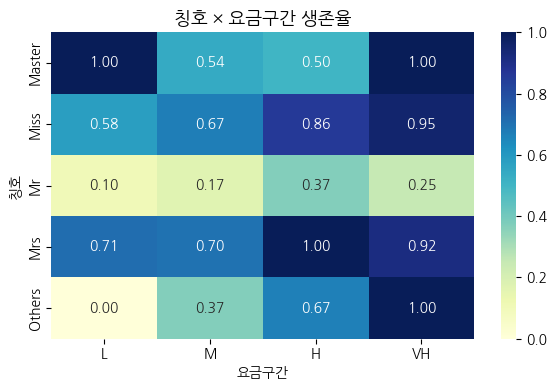

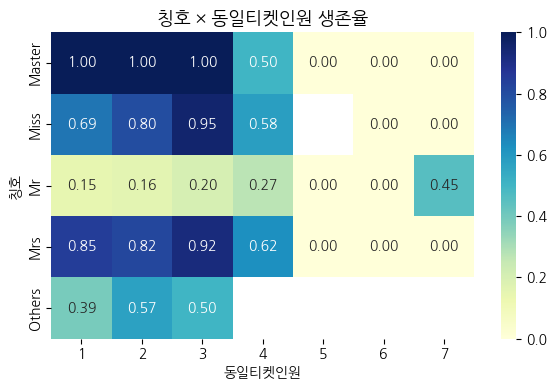

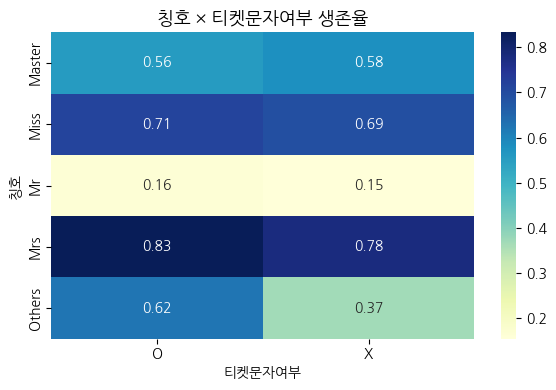

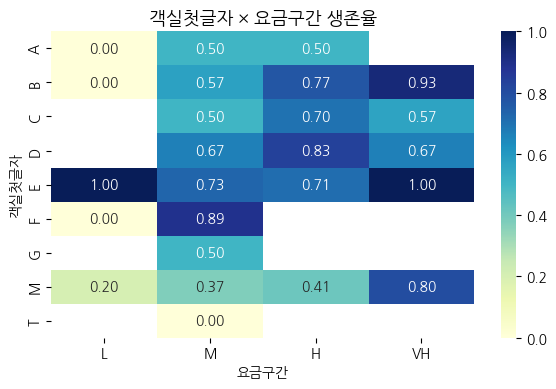

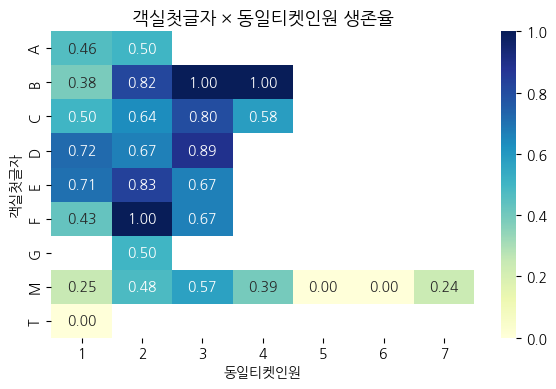

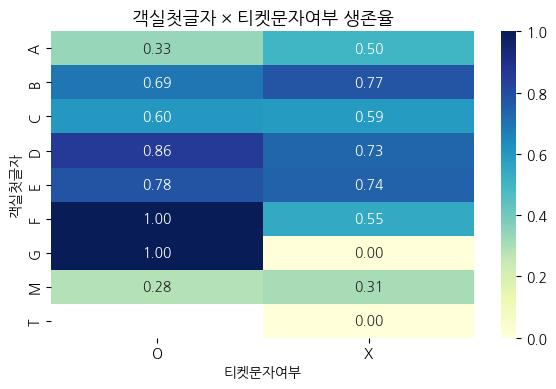

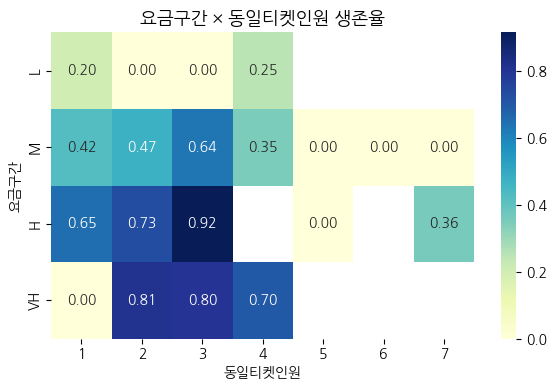

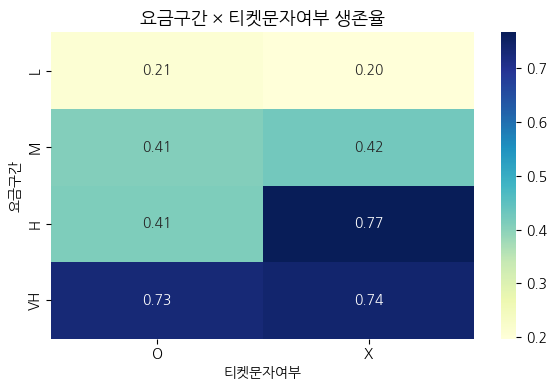

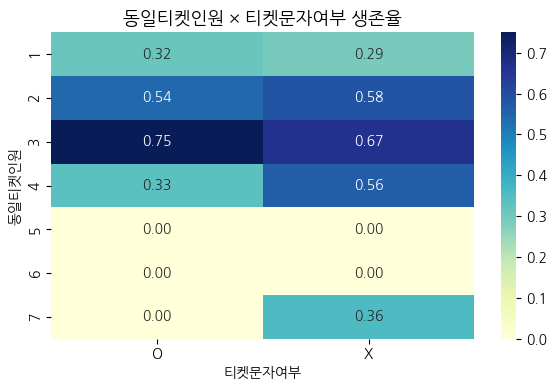

In [138]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = analysis_cols  # 범주형 변수 10개

for v1, v2 in itertools.combinations(cat_cols, 2):
    pivot = (
        df_Features_Prep.join(df_Target)
        .groupby([v1, v2], observed=True)["생존여부"]
        .mean()
        .unstack()
    )

    plt.figure(figsize=(6,4))
    sns.heatmap(
        pivot,
        annot=True, fmt=".2f", cmap="YlGnBu", cbar=True
    )
    plt.title(f"{v1} × {v2} 생존율", fontsize=13)
    plt.ylabel(v1)
    plt.xlabel(v2)
    plt.tight_layout()
    plt.show()
